In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score
import librosa
import librosa.display
from scipy.io import wavfile
from IPython.display import Audio, display
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost as xgb

In [2]:
df = pd.read_csv ("music_classification.csv")
df.head()

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [3]:
df = df.drop(labels = "beats", axis =1)
df.head()

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
df.shape

(1000, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class_name          1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   chroma_stft         1000 non-null   float64
 3   rmse                1000 non-null   float64
 4   spectral_centroid   1000 non-null   float64
 5   spectral_bandwidth  1000 non-null   float64
 6   rolloff             1000 non-null   float64
 7   zero_crossing_rate  1000 non-null   float64
 8   mfcc1               1000 non-null   float64
 9   mfcc2               1000 non-null   float64
 10  mfcc3               1000 non-null   float64
 11  mfcc4               1000 non-null   float64
 12  mfcc5               1000 non-null   float64
 13  mfcc6               1000 non-null   float64
 14  mfcc7               1000 non-null   float64
 15  mfcc8               1000 non-null   float64
 16  mfcc9  

In [6]:
df.describe()

,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,-10.716073,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,56.666090,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [7]:
df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [8]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [9]:
Genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))
Genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [10]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5264\1140773217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="tempo", data=x, palette='husl')


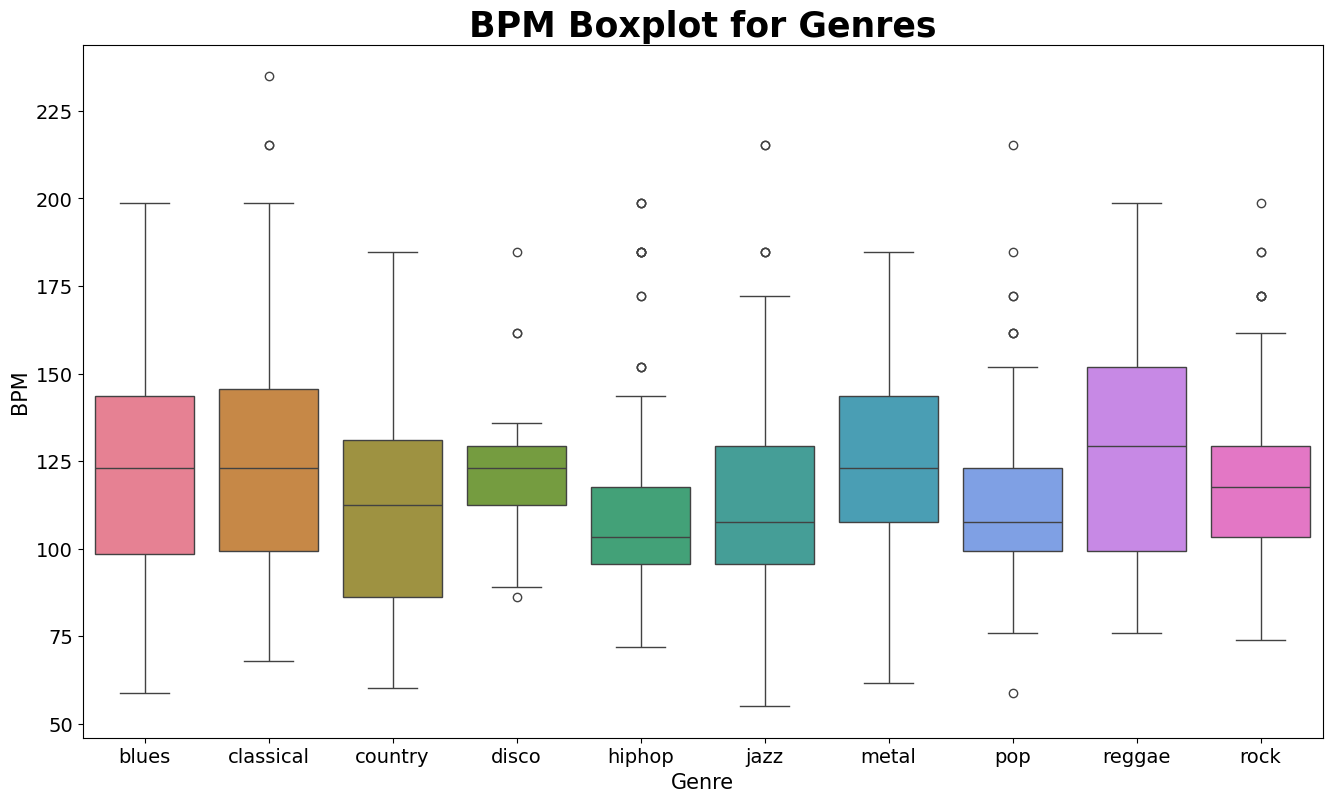

In [11]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

plt.title('BPM Boxplot for Genres', fontsize=25, fontweight='bold')
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5264\3779972141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['label'], palette = 'viridis')


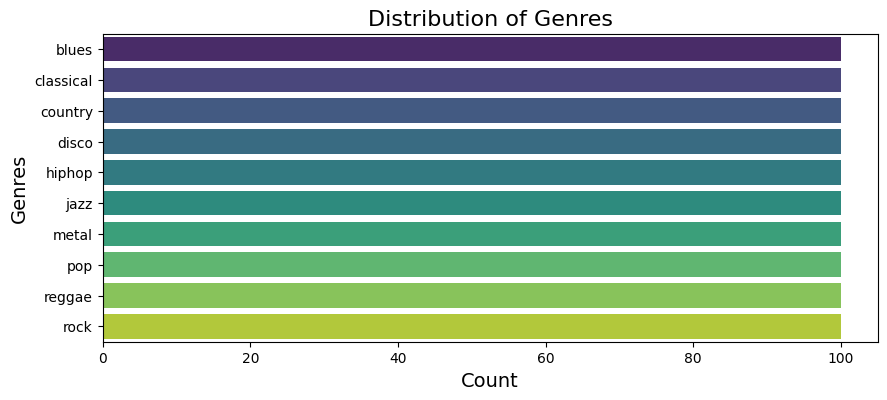

In [12]:
plt.figure(figsize = (10, 4))
sns.countplot(y = df['label'], palette = 'viridis')
plt.title('Distribution of Genres', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Genres', fontsize = 14)
plt.show()

In [13]:
df.isna().mean()

class_name            0.0
tempo                 0.0
chroma_stft           0.0
rmse                  0.0
spectral_centroid     0.0
spectral_bandwidth    0.0
rolloff               0.0
zero_crossing_rate    0.0
mfcc1                 0.0
mfcc2                 0.0
mfcc3                 0.0
mfcc4                 0.0
mfcc5                 0.0
mfcc6                 0.0
mfcc7                 0.0
mfcc8                 0.0
mfcc9                 0.0
mfcc10                0.0
mfcc11                0.0
mfcc12                0.0
mfcc13                0.0
mfcc14                0.0
mfcc15                0.0
mfcc16                0.0
mfcc17                0.0
mfcc18                0.0
mfcc19                0.0
mfcc20                0.0
label                 0.0
class_label           0.0
dtype: float64

In [14]:
audio_fp = 'Data/genres_original/pop/pop.00069.wav'
audio_data, sr = librosa.load(audio_fp, offset=0, duration=30)
audio_data, _ = librosa.effects.trim(audio_data)
audio_data.shape

(661500,)

In [15]:
collection = np.split(audio_data,10)

In [16]:
from pprint import pprint
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [17]:
IPython.display.Audio(audio_data, rate=sr)

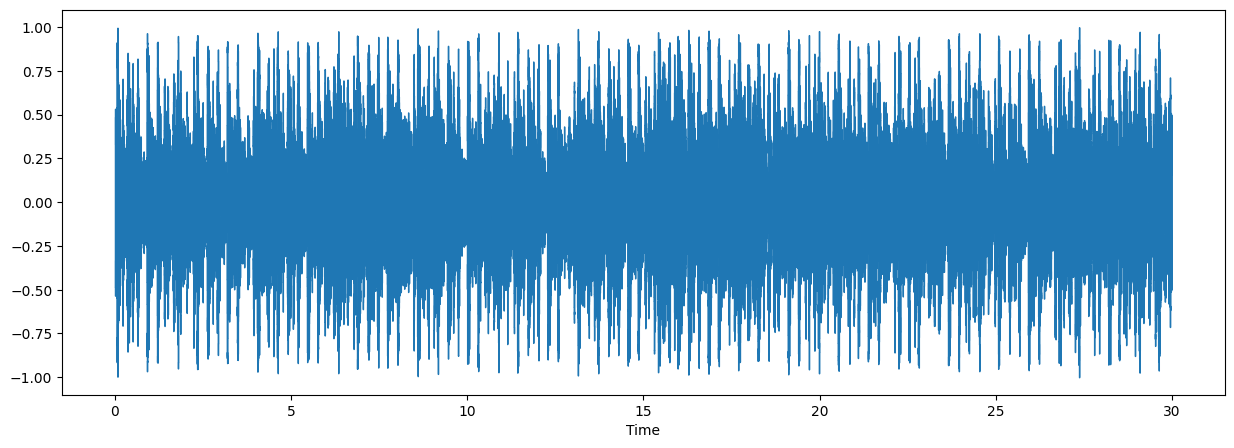

In [18]:
import matplotlib.pyplot as plt
import librosa.display as lplt

plt.figure(figsize=(15, 5))
lplt.waveshow(audio_data)
plt.show()

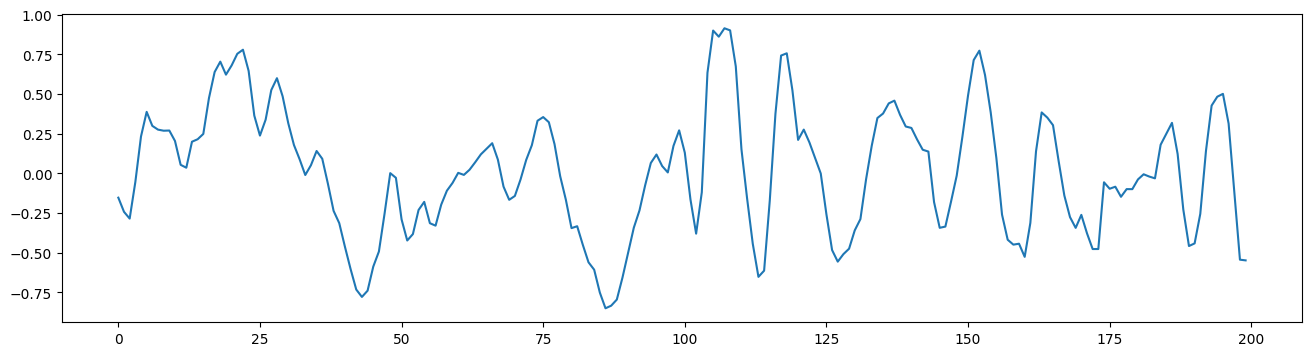

In [19]:
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5264\672660490.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  stft_db = librosa.amplitude_to_db(stft, ref=np.max)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5264\672660490.py:8: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


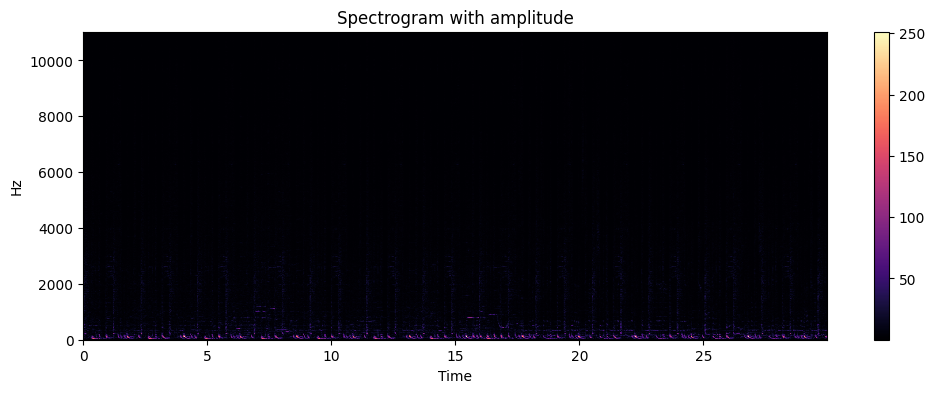

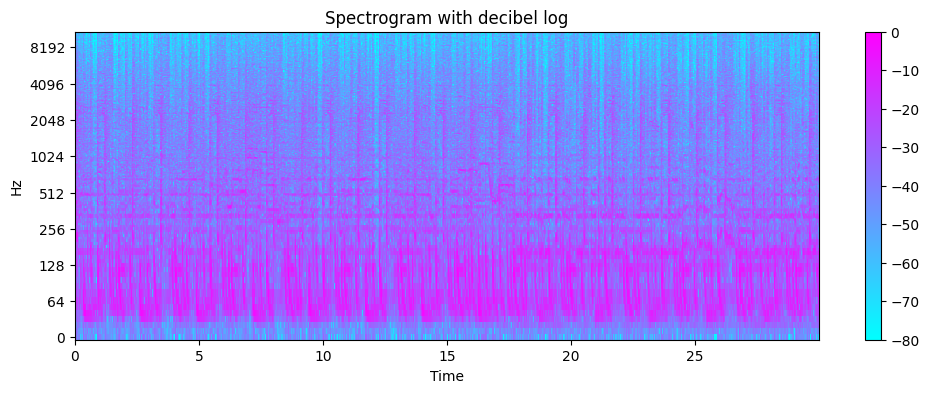

In [20]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

In [21]:
X = df.iloc[:,1:28]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
svm = SVC(kernel='poly')
svm.fit(X_train_scaled, y_train)
y_predict_svm = svm.predict(X_test_scaled)

In [24]:
accuracy = accuracy_score(y_test, y_predict_svm)
precision = precision_score(y_test, y_predict_svm, average = 'weighted')
f1 = f1_score(y_test, y_predict_svm, average='weighted') 
recall = recall_score(y_test, y_predict_svm, average='weighted')

In [25]:
print("Accuracy:", accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.704
Precision: 0.715273566890992
Recall: 0.704
F1: 0.7039080977424053


In [26]:
logreg = LogisticRegression(solver = 'newton-cholesky', class_weight = 'balanced', max_iter = 4000)
logreg.fit(X_train_scaled, y_train)
y_predict_logreg = logreg.predict(X_test_scaled)

In [27]:
accuracy = accuracy_score(y_test, y_predict_logreg)
precision = precision_score(y_test, y_predict_logreg, average = 'weighted')
f1 = f1_score(y_test, y_predict_logreg, average='weighted') 
recall = recall_score(y_test, y_predict_logreg, average='weighted')

In [28]:
print("Accuracy:", accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.64
Precision: 0.6474460503471713
Recall: 0.64
F1: 0.6421670886884904


In [29]:
import xgboost as xgb

In [30]:
xgbc = xgb.XGBClassifier(n_estimators=100, random_state=seed)
xgbc.fit(X_train_scaled, y_train)
y_predict_xgboost = xgbc.predict(X_test_scaled)

In [31]:
accuracy = accuracy_score(y_test, y_predict_xgboost)
precision = precision_score(y_test, y_predict_xgboost, average = 'weighted')
f1 = f1_score(y_test, y_predict_xgboost, average='weighted') 
recall = recall_score(y_test, y_predict_xgboost, average='weighted')

In [32]:
print("Accuracy:", accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.664
Precision: 0.6971699214908675
Recall: 0.664
F1: 0.6741426006473826


In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_predict_knn = knn.predict(X_test_scaled)

In [34]:
accuracy = accuracy_score(y_test, y_predict_knn)
precision = precision_score(y_test, y_predict_knn, average = 'weighted')
f1 = f1_score(y_test, y_predict_knn, average='weighted') 
recall = recall_score(y_test, y_predict_knn, average='weighted')

In [35]:
print("Accuracy:", accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.66
Precision: 0.6946455585155608
Recall: 0.66
F1: 0.6651986134633175


In [36]:
def getmetadata(filename):
    y, sr = librosa.load(filename)

    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)   
    spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    zero_crossing = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    metadata_dict = {'tempo':tempo,'chroma_stft':np.mean(chroma_stft),'rmse':np.mean(rmse),
                     'spectral_centroid':np.mean(spec_centroid),'spectral_bandwidth':np.mean(spec_bw), 
                     'rolloff':np.mean(spec_rolloff), 'zero_crossing_rates':np.mean(zero_crossing)}
    for i in range(1,21):
        metadata_dict.update({'mfcc'+str(i):np.mean(mfcc[i-1])})

    return list(metadata_dict.values())

In [57]:
a = getmetadata("Data/genres_original/metal/metal.00003.wav")

C:\Users\Admin\AppData\Local\Temp\ipykernel_5264\1666279486.py:5: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)


In [58]:
d1 = np.array(a, dtype=object)
data1 = scaler.transform([d1])
genre_prediction_knn = knn.predict(data1)
print(Genre_name[genre_prediction_knn[0]])

metal


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [59]:
d1 = np.array(a, dtype=object)
data1 = scaler.transform([d1])
genre_prediction_logreg = logreg.predict(data1)
print(Genre_name[genre_prediction_logreg[0]])

metal


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [60]:
d1 = np.array(a, dtype=object)
data1 = scaler.transform([d1])
genre_prediction_xgbc = xgbc.predict(data1)
print(Genre_name[genre_prediction_xgbc[0]])

metal


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [61]:
d1 = np.array(a, dtype=object)
data1 = scaler.transform([d1])
genre_prediction_svm = svm.predict(data1)
print(Genre_name[genre_prediction_svm[0]])

metal


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
